# Lab 3

Dmytro Geleshko

IP-91

## Imports

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Config

In [79]:
pd.set_option("display.precision", 2)

# Task 1
## New York Data

New York, New York, Average Temperature, January

Units: Degrees Fahrenheit

Base Period: 1901-2000

Missing: -99

## Load

In [80]:
df = pd.read_csv("../Data/USH00305801-tavg-1-1-1895-2018.csv", parse_dates=True, skiprows=4)
df

,Date,Value,Anomaly
0,189501,29.40,-2.60
1,189601,29.00,-3.00
2,189701,29.80,-2.20
3,189801,34.40,2.40
4,189901,30.30,-1.70
...,...,...,...
119,201401,28.70,-3.30
120,201501,30.00,-2.00
121,201601,34.50,2.50
122,201701,38.10,6.10


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     124 non-null    int64  
 1   Value    124 non-null    float64
 2   Anomaly  124 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


## Primary Transformation

In [82]:
df.columns = ["date", "temp", "anomaly"]

df["date"] = pd.to_datetime(df["date"] // 100, format="%Y")

df[["temp", "anomaly"]] = df[["temp", "anomaly"]].astype(np.float32)
df

,date,temp,anomaly
0,1895-01-01,29.40,-2.60
1,1896-01-01,29.00,-3.00
2,1897-01-01,29.80,-2.20
3,1898-01-01,34.40,2.40
4,1899-01-01,30.30,-1.70
...,...,...,...
119,2014-01-01,28.70,-3.30
120,2015-01-01,30.00,-2.00
121,2016-01-01,34.50,2.50
122,2017-01-01,38.10,6.10


## Info

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     124 non-null    datetime64[ns]
 1   temp     124 non-null    float32       
 2   anomaly  124 non-null    float32       
dtypes: datetime64[ns](1), float32(2)
memory usage: 2.1 KB


## Stats
Get stats about our data

In [84]:
df.describe()

,temp,anomaly
count,124.00,124.00
mean,32.13,0.13
std,4.45,4.45
min,21.60,-10.40
25%,29.37,-2.62
50%,32.00,0.00
75%,34.87,2.87
max,43.30,11.30


# Task 2

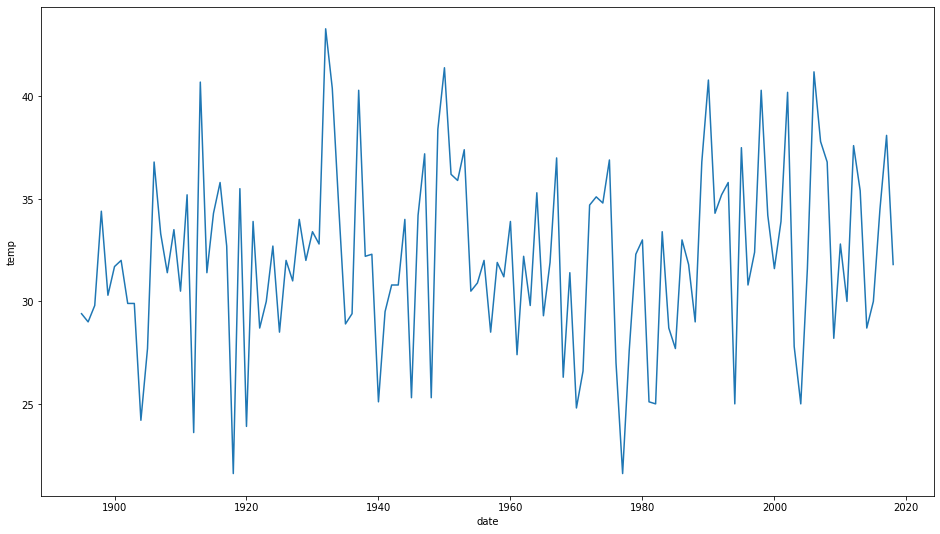

In [94]:
plt.figure(figsize=(16, 9))
sns.lineplot(data=df, x="date", y="temp")
plt.show()

In [ ]:
df.dropna().sort_values("age").iloc[-1]

name        Barkworth, Mr. Algernon Henry W
survived                                  1
age                                   80.00
class                                     1
isMale                                    1
Name: 14, dtype: object

In [ ]:
df_female_1st = df[(df["isMale"] == False) & (df["class"] == 1)]
df_female_1st

,name,survived,age,class,isMale
0,"Allen, Miss. Elisabeth Walton",1,29.00,1,0
2,"Allison, Miss. Helen Loraine",0,2.00,1,0
4,"Allison, Mrs. Hudson J C (Bessi",0,25.00,1,0
6,"Andrews, Miss. Kornelia Theodos",1,63.00,1,0
8,"Appleton, Mrs. Edward Dale (Cha",1,53.00,1,0
...,...,...,...,...,...
311,"Wick, Mrs. George Dennick (Mary",1,45.00,1,0
314,"Widener, Mrs. George Dunton (El",1,50.00,1,0
315,"Willard, Miss. Constance",1,21.00,1,0
319,"Wilson, Miss. Helen Alice",1,31.00,1,0


# The End